# Data Analysis

**Context**
Typically e-commerce datasets are proprietary and consequently hard to find among publicly available data. However, The UCI Machine Learning Repository has made this dataset containing actual transactions from 2010 and 2011. The dataset is maintained on their site, where it can be found by the title "Online Retail".

**Content**
"This is a transnational data set which contains all the transactions occurring between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retail.The company mainly sells unique all-occasion gifts. Many customers of the company are wholesalers."

**Acknowledgements**
Per the UCI Machine Learning Repository, this data was made available by Dr Daqing Chen, Director: Public Analytics group. chend '@' lsbu.ac.uk, School of Engineering, London South Bank University, London SE1 0AA, UK.

Image from stocksnap.io.

**Inspiration**
Analyses for this dataset could include time series, clustering, classification and more.

In [236]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [237]:
data = pd.read_csv('data.csv', encoding='latin1')
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


How would you calculate the percentage of missing values in each column of the dataset, and create a bar plot to show these percentages for all columns? 

In [238]:
total_nulls = data.isnull().sum()
per_nulls = (total_nulls/len(data))*100
print(f"No.of nulls in each column are:\n{per_nulls}")

No.of nulls in each column are:
InvoiceNo       0.000000
StockCode       0.000000
Description     0.268311
Quantity        0.000000
InvoiceDate     0.000000
UnitPrice       0.000000
CustomerID     24.926694
Country         0.000000
dtype: float64


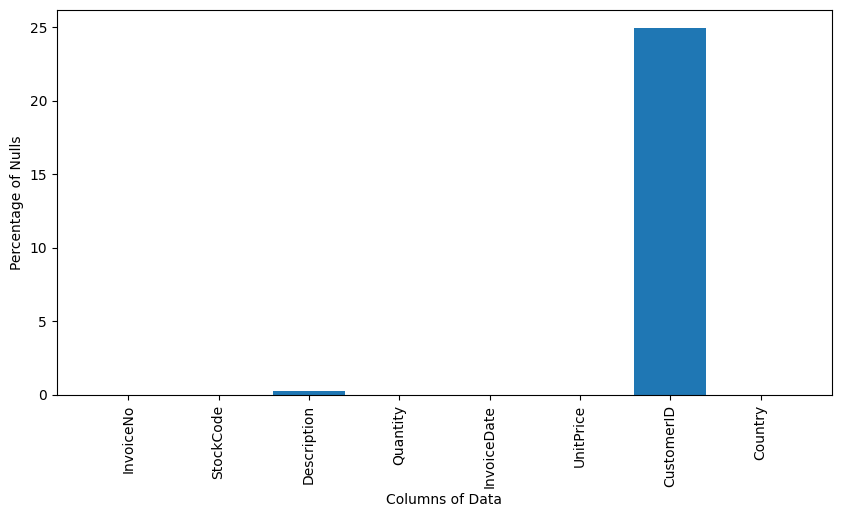

In [239]:
plt.figure(figsize=(10,5))
plt.bar(per_nulls.index, per_nulls)
plt.xticks(rotation=90)
plt.xlabel("Columns of Data")
plt.ylabel("Percentage of Nulls")
plt.show()

What approach would you use to drop rows with missing CustomerID, and how would you confirm the number of rows dropped using a summary table? 

In [240]:
print(f"Total data before dropping any data is : {len(data)}")
data = data.dropna(subset=['CustomerID'],axis=0)
print(f"Total data after dropping any data is : {len(data)}")

Total data before dropping any data is : 541909
Total data after dropping any data is : 406829


How would you fill missing Description values with the string “Unknown” ?

In [241]:
# First check if 'Description' column exists
if 'Description' in data.columns:
    data['Description'] = data['Description'].fillna('Unknown')
    print(f"Number of null values in Description: {data['Description'].isnull().sum()}")
else:
    print("'Description' column not found in the dataset")

Number of null values in Description: 0


How would you identify duplicate transactions based on InvoiceNo, StockCode, and Quantity, and create a bar plot showing the number of duplicates found versus unique transactions? 

In [242]:
duplicates = data[data.duplicated(subset=["InvoiceNo", "StockCode", "Quantity"], keep=False)]
print(f"Total no. of duplicated values: {len(duplicates)}")

print(f"Total duplicated Values = {(len(duplicates)/len(data))*100:.2f}%")


Total no. of duplicated values: 10159
Total duplicated Values = 2.50%


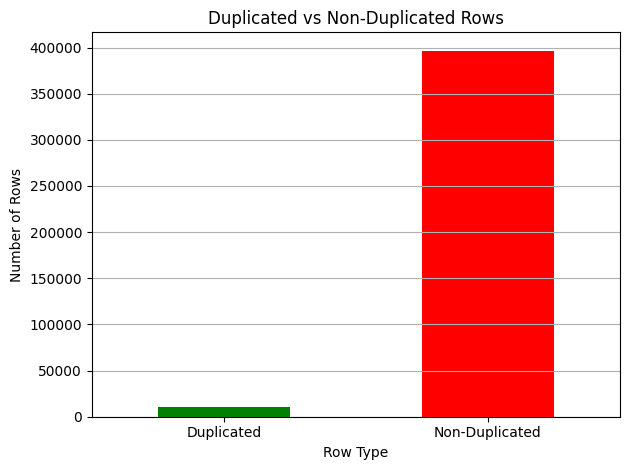

In [243]:
dup_counts = pd.Series({
    'Duplicated': len(duplicates),
    'Non-Duplicated': len(data) - len(duplicates)
})
dup_counts.plot(kind='bar', color=['green', 'red'])
plt.title('Duplicated vs Non-Duplicated Rows')
plt.ylabel('Number of Rows')
plt.xlabel('Row Type')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

What method would you use to remove duplicate transactions, keeping the first occurrence, and confirm their removal by checking the total row count before and after in a table? 

In [244]:
print(f"Data before dropping duplicates: {len(data)}")
data = data.drop_duplicates(subset=["InvoiceNo", "StockCode", "Quantity"], keep="first")
print(f"Data after dropping duplicates:  {len(data)}")

Data before dropping duplicates: 406829
Data after dropping duplicates:  401548


How would you filter out cancellation transactions (where InvoiceNo starts with ‘C’), and visualize the proportion of cancellations versus non-cancellations in a pie chart? 

Total number of cancelled orders: 8841


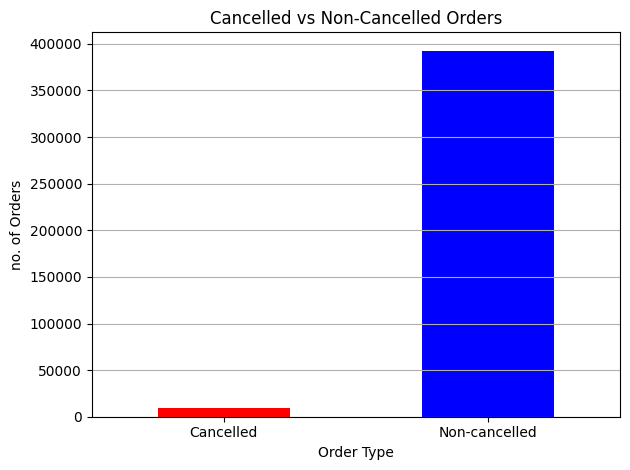

In [245]:
cancel = data['InvoiceNo'].str.startswith('C')
print(f"Total number of cancelled orders: {cancel.sum()}")

cancel_order = pd.Series({
    'Cancelled': cancel.sum(),
    'Non-cancelled':len(data)-cancel.sum()
})
cancel_order.plot(kind='bar',color=['red','blue'])
plt.title("Cancelled vs Non-Cancelled Orders")
plt.xlabel("Order Type")
plt.ylabel("no. of Orders")
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

What strategy would you use to create a TotalPrice column by multiplying Quantity and UnitPrice, and plot a histogram to show the distribution of TotalPrice? 

In [246]:
data['Total_Price'] = data['Quantity'] * data['UnitPrice']

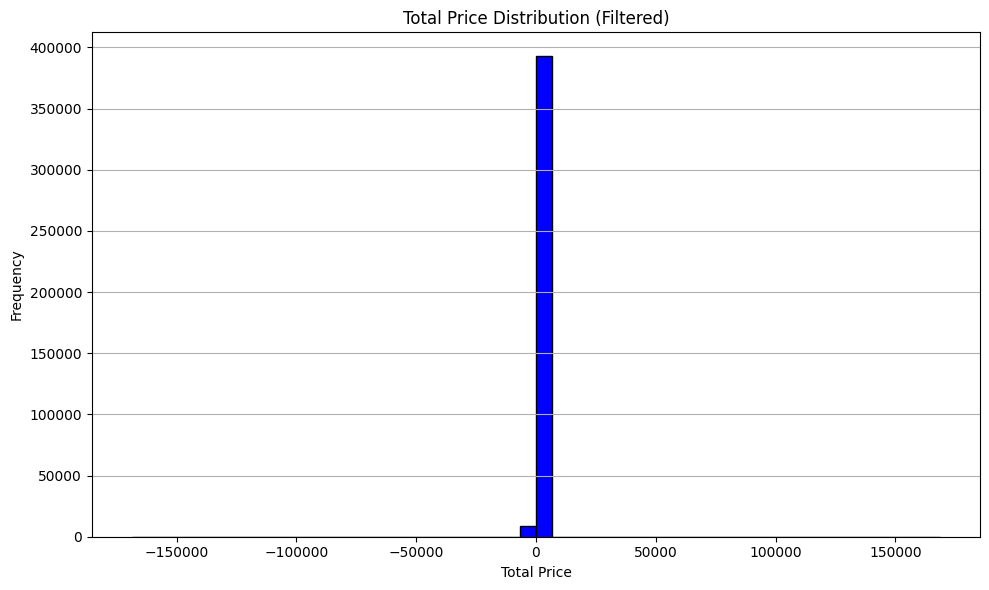

In [247]:
# Define your range for filtering
lower_limit = data['Total_Price'].min()
upper_limit = data['Total_Price'].max()

# Filter the 'Total_Price' column within the range
filtered_data = data['Total_Price']

# Plot the histogram with bins only in the defined range
plt.figure(figsize=(10, 6))
plt.hist(filtered_data, bins=50, color='blue', edgecolor='black')  # Define number of bins
plt.title("Total Price Distribution (Filtered)")
plt.xlabel("Total Price")
plt.ylabel("Frequency")
plt.grid(axis='y')
plt.tight_layout()
plt.show()

How would you convert InvoiceDate to a datetime format and extract the Month as a new column .

In [248]:
from datetime import datetime
data_month = pd.to_datetime(data['InvoiceDate'], format='%m/%d/%Y %H:%M')
data['Month'] = data_month.dt.month
data.head(10)


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total_Price,Month
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,15.30,12
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34,12
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,22.00,12
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34,12
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34,12
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,12/1/2010 8:26,7.65,17850.0,United Kingdom,15.30,12
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,12/1/2010 8:26,4.25,17850.0,United Kingdom,25.50,12
7,536366,22633,HAND WARMER UNION JACK,6,12/1/2010 8:28,1.85,17850.0,United Kingdom,11.10,12
8,536366,22632,HAND WARMER RED POLKA DOT,6,12/1/2010 8:28,1.85,17850.0,United Kingdom,11.10,12
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,12/1/2010 8:34,1.69,13047.0,United Kingdom,54.08,12


How would you standardize Description by converting it to uppercase and removing extra spaces? 

In [249]:
data['Description'] = data['Description'].str.strip().str.capitalize()
data['Description'].head(10)

0     White hanging heart t-light holder
1                    White metal lantern
2         Cream cupid hearts coat hanger
3    Knitted union flag hot water bottle
4         Red woolly hottie white heart.
5           Set 7 babushka nesting boxes
6      Glass star frosted t-light holder
7                 Hand warmer union jack
8              Hand warmer red polka dot
9          Assorted colour bird ornament
Name: Description, dtype: object

How would you convert the Country column to a categorical data type, and display a table comparing memory usage before and after the conversion? 

In [250]:
print(f"Memory usage befor: {data['Country'].memory_usage()}")
data['Country'] = data['Country'].astype('category')
data['Country'].sample(10)      # used to take 10 random samples from the column

Memory usage befor: 6424768


408415              EIRE
369057              EIRE
285030    United Kingdom
170942    United Kingdom
398476    United Kingdom
237561    United Kingdom
488763              EIRE
242690    United Kingdom
71276     United Kingdom
444426    United Kingdom
Name: Country, dtype: category
Categories (37, object): ['Australia', 'Austria', 'Bahrain', 'Belgium', ..., 'USA', 'United Arab Emirates', 'United Kingdom', 'Unspecified']

In [251]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total_Price,Month
0,536365,85123A,White hanging heart t-light holder,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,15.30,12
1,536365,71053,White metal lantern,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34,12
2,536365,84406B,Cream cupid hearts coat hanger,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,22.00,12
3,536365,84029G,Knitted union flag hot water bottle,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34,12
4,536365,84029E,Red woolly hottie white heart.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34,12


How would you bin TotalPrice into three fixed categories (‘Low’ ≤50, ‘Medium’ 50-200, ‘High’ >200), and create a count plot to show the number of transactions in each bin? 

No. of low data(<= 50) are : 374655
No. of medium data(>50 and <=200) are : 22857
No. of high data(>200) are : 4036


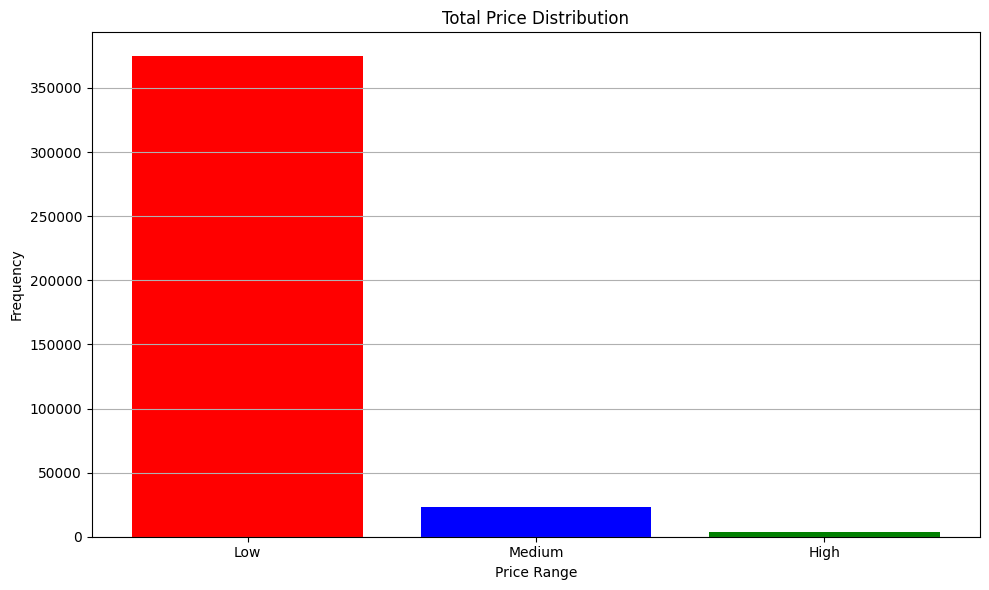

In [252]:
low_data = data[data['Total_Price']<= 50]
print(f"No. of low data(<= 50) are : {len(low_data)}")
medium_data = data[(data['Total_Price']>50) & (data['Total_Price']<= 200)]
print(f"No. of medium data(>50 and <=200) are : {len(medium_data)}")
high_data = data[data['Total_Price']>200]
print(f"No. of high data(>200) are : {len(high_data)}")

plt.figure(figsize=(10, 6))
plt.bar(['Low','Medium','High'], [len(low_data),len(medium_data),len(high_data)],color=['red','blue','green'])
plt.title("Total Price Distribution")
plt.xlabel("Price Range")
plt.ylabel("Frequency")
plt.grid(axis='y')
plt.tight_layout()
plt.show()



What method would you use to detect outliers in Quantity using the IQR method, and visualize the distribution of Quantity with box plots before and after outlier removal? 

Data before dropping any data is : 401548


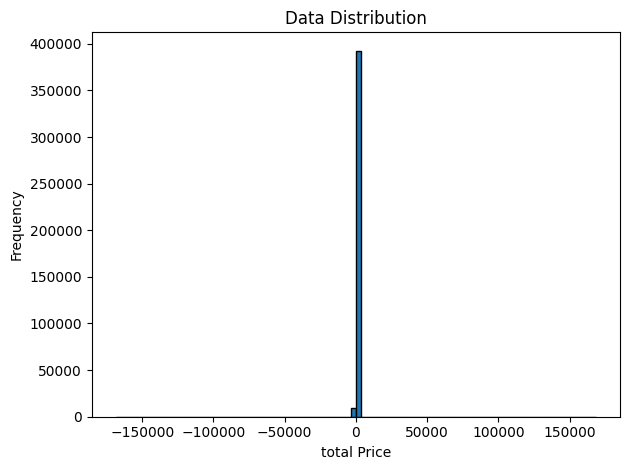

In [253]:
print(f"Data before dropping any data is : {len(data)}")
plt.hist(data['Total_Price'], bins=100, edgecolor='black')
plt.title("Data Distribution")
plt.xlabel("total Price")
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

In [254]:
q1 = data['Quantity'].quantile(0.25)
q3 = data['Quantity'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1-1.5 * iqr
upper_bound = q3+1.5 * iqr
print(f"Lower Bound: {lower_bound} while minimum value is {data['Quantity'].min()}")
print(f"Upper Bound: {upper_bound} while maximum value is {data['Quantity'].max()}")
data_outlier = data[(data['Quantity'] > lower_bound) | (data['Quantity'] < upper_bound)]
print(f"Total number of non-outliers {len(data_outlier)} and outliers is {len(data)-len(data_outlier)} while total data is {len(data)}")

Lower Bound: -13.0 while minimum value is -80995
Upper Bound: 27.0 while maximum value is 80995
Total number of non-outliers 401548 and outliers is 0 while total data is 401548


Data after dropping any data is : 401548


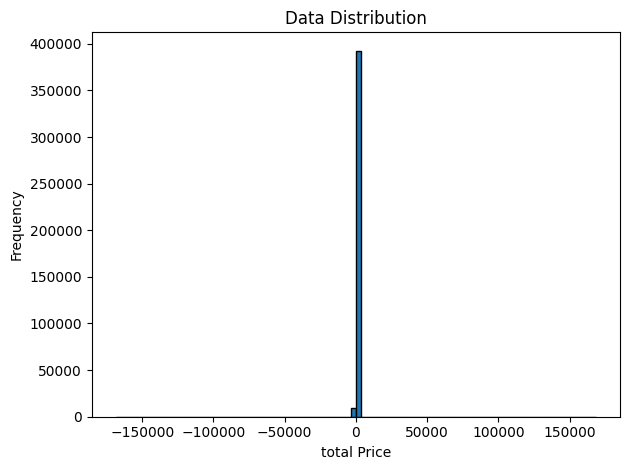

In [255]:
print(f"Data after dropping any data is : {len(data_outlier)}")
plt.hist(data_outlier['Total_Price'], bins=100, edgecolor='black')
plt.title("Data Distribution")
plt.xlabel("total Price")

plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

How would you replace negative UnitPrice values with zero ?

In [256]:
print(f"Number of Unit Prices less than 0: {sum(data['UnitPrice'] < 0)}")
data.loc[data['UnitPrice']<0,'UnitPrice'] = 0
print(f"Number of Unit Prices less than 0: {sum(data['UnitPrice'] < 0)}")


Number of Unit Prices less than 0: 0
Number of Unit Prices less than 0: 0


What approach would you use to rename the InvoiceNo column to OrderID for clarity, and display a sample of the dataset to confirm the change? 

In [257]:
data.rename(columns={'InvoiceNo':'OrderID'},inplace=True)
data['OrderID'].sample(10)

302013    563369
494271    578266
404700    571683
499767    578688
230863    557221
350070    567612
413465    572312
456986    575728
410779    572130
109253    545590
Name: OrderID, dtype: object